In [13]:
using Plots
gr()

# Mean Field Theory and The Ising Model 

### By: Jose M Munoz

## Introduction 

In the realm of statistical physics, understanding complex systems composed of many interacting particles is a formidable challenge. Mean-field theory (MFT) is a powerful tool that simplifies the problem by treating interactions in an approximated manner. This chapter aims to provide a comprehensive understanding of the mean-field theory and its application to one of the most famous models in statistical physics: the Ising model. 

## The Ising Model 

The Ising model was proposed by Wilhelm Lenz and solved by his student Ernst Ising in one dimension. It is a mathematical model of ferromagnetism in statistical mechanics and is defined on a lattice. Let's consider a $d$-dimensional cubic lattice of $N$ spins, where each spin $s_i$ can take values $+1$ (spin up) or $-1$ (spin down). The Hamiltonian for the Ising model is given by:

\begin{equation}
H = -J\sum_{\langle i,j \rangle}s_is_j - h\sum_{i}s_i
\end{equation}

where $\langle i,j \rangle$ denotes a sum over nearest neighbors, $J$ is the interaction strength (positive for ferromagnetic interactions), and $h$ is an external magnetic field. 

## Mean-Field Theory for the Ising Model

Mean-field theory is an approximation method that simplifies the treatment of the interactions. The basic idea is to replace all the interactions of a given spin with an average or "mean" field. 

In the absence of an external field ($h=0$), the mean field at site $i$, denoted $h_i$, due to all the other spins is:

\begin{equation}
h_i = J\sum_{j}^{}s_j
\end{equation}

In the MFT approximation, we replace $h_i$ with a mean field $h_m = Jz\langle s \rangle$, where $z$ is the number of nearest neighbors, and $\langle s \rangle$ is the average spin, which is a measure of the magnetization $m$ per site.

The energy of a spin in this mean field is $-s_i h_m = -s_iJz\langle s \rangle$. The partition function for a single spin is then:

\begin{equation}
Z = \sum_{s_i = \pm 1}^{}e^{\beta s_iJz\langle s \rangle} = 2\cosh(\beta Jz\langle s \rangle)
\end{equation}

where $\beta = 1/k_BT$ is the inverse temperature times the Boltzmann constant. From this, we can compute the average spin or magnetization per site:

\begin{equation}
\langle s \rangle = \frac{1}{Z}\sum_{s_i = \pm 1}^{}s_ie^{\beta s_iJz\langle s \rangle} = \tanh(\beta Jz\langle s \rangle)
\end{equation}

This is the self-consistency equation. In the MFT approximation, we assume that the magnetization is the same for all sites, so $\langle s \rangle = m$.

## Solution of Self-Consistency Equation

The self-consistency equation is a transcendental equation for $m$:

\begin{equation}
m = \tanh(\beta Jzm)
\end{equation}

We can solve this equation numerically for given values of $\beta Jz$ (which is equivalent to knowing the temperature and the interaction strength).

 

However, we can also understand some of its features analytically. For small $m$, we can expand the right-hand side to get:

\begin{equation}
m \approx \beta Jzm - \frac{(\beta Jzm)^3}{3}
\end{equation}


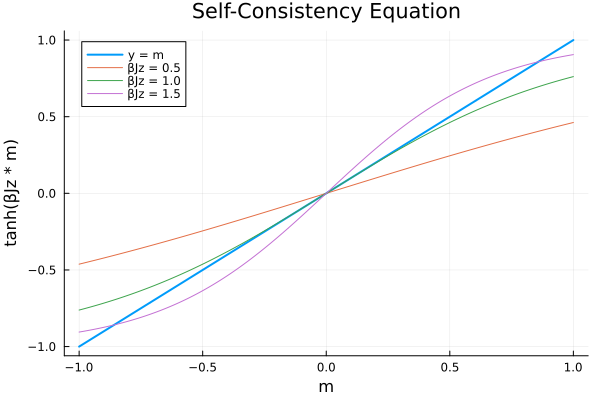

In [12]:
magnetization_f(m, βJz) = tanh(βJz * m)

m = -1:0.01:1 # m range
βJz_values = [0.5, 1.0, 1.5] # different values of βJz

p1 = plot(m, m, label="y = m", lw=2) # plot y = m line

for βJz in βJz_values
    plot!(p1, m, magnetization_f.(m, βJz), label="βJz = $βJz")
end

title!(p1, "Self-Consistency Equation")
xlabel!(p1, "m")
ylabel!(p1, "tanh(βJz * m)")



If $\beta Jz<1$, the linear term dominates, and the only solution is $m=0$, which corresponds to a paramagnetic (disordered) phase. If $\beta Jz>1$, the cubic term becomes important and new non-zero solutions for $m$ appear, signaling a ferromagnetic (ordered) phase. The critical point at $\beta Jz=1$ marks the phase transition from the disordered to the ordered phase.

This simple mean-field theory captures the qualitative behavior of the Ising model, although it overestimates the critical temperature in dimensions $d>1$.

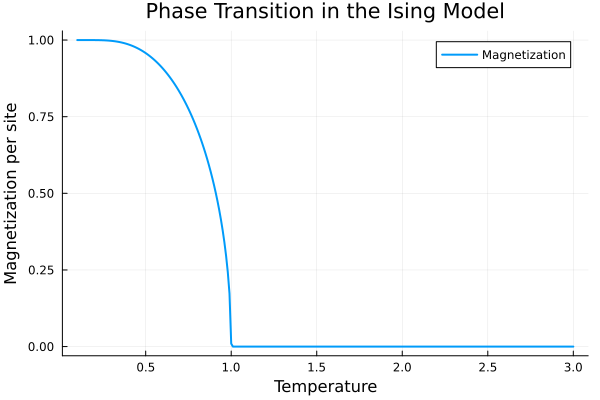

In [24]:
# Solve the self-consistency equation using a simple iteration
function solve_self_consistency(βJz; m_init=0.01, num_iters=1000)
    m = m_init
    for _ in 1:num_iters
        m = magnetization_f(m, βJz)
    end
    return m
end

T_values = 0.1:0.01:3.0 # temperature range
β_values = 1 ./ T_values
Jz = 1.0

m_values = solve_self_consistency.(β_values*Jz)

p2 = plot(T_values, m_values, label="Magnetization", lw=2)
title!(p2, "Phase Transition in the Ising Model")
xlabel!(p2, "Temperature")
ylabel!(p2, "Magnetization per site")


## Paramagnetic 
Susceptibility
In the absence of an external magnetic field ($B=0$), the self-consistency equation simplifies to $m = \tanh(\beta zJm)$. In the high-temperature limit ($\beta\rightarrow 0$ or $T\rightarrow\infty$), the system behaves as a paramagnet, and the magnetization $m$ approaches zero.

The susceptibility $\chi$ is a measure of how much the magnetization will change in response to an applied magnetic field. It can be obtained by differentiating the magnetization $m$ with respect to the magnetic field $B$:

\begin{equation}
\chi = \frac{\partial m}{\partial B}
\end{equation}

In the high-temperature limit, the susceptibility $\chi$ is given by the Curie law:

\begin{equation}
\chi = \frac{1}{T}
\end{equation}

This result is derived from the mean-field approximation and should be compared with exact solutions or experiments.

## Demonstration with Code

Below we will add some code to demonstrate the Ising model and mean field theory. We will use the Ising model to simulate a ferromagnetic material.

┌ Info: Saved animation to /home/jose/Documents/STUDY/Bsc/CondensedMat/notes/ising_model_animation.gif
└ @ Plots /home/jose/.julia/packages/Plots/B5j7d/src/animation.jl:156


Plots.AnimatedGif("/home/jose/Documents/STUDY/Bsc/CondensedMat/notes/ising_model_animation.gif")
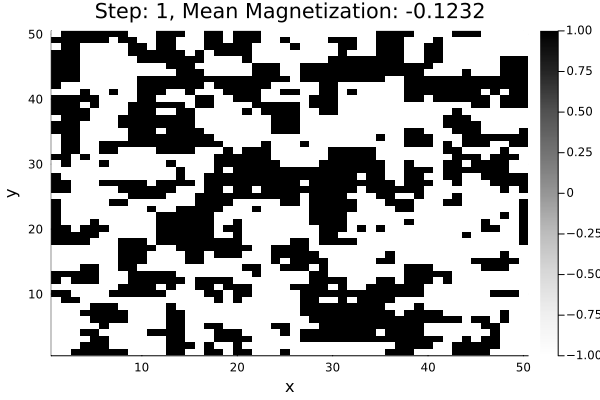

In [25]:

# Function to update the Ising model state
function update_ising_state!(state, beta, h)
    L = size(state, 1)
    for i in 1:L
        for j in 1:L
            # Calculate the local field
            local_field = h + beta * (state[mod1(i-1, L), j] + state[mod1(i+1, L), j] +
                                      state[i, mod1(j-1, L)] + state[i, mod1(j+1, L)])
            # Update the spin based on the local field
            if local_field > 0
                state[i, j] = 1
            elseif local_field < 0
                state[i, j] = -1
            else
                state[i, j] = rand([-1, 1])
            end
        end
    end
end

# Function to compute the mean magnetization
function compute_mean_magnetization(state)
    return sum(state) / length(state)
end

# Parameters
L = 50  # Size of the lattice
beta = 0.5  # Inverse temperature
h = 0.0  # External magnetic field

# Initialize the Ising model state
state = rand([-1, 1], L, L)

# Create the animation
anim = @animate for step in 1:200
    update_ising_state!(state, beta, h)

    # Compute the mean magnetization
    mean_magnetization = compute_mean_magnetization(state)

    # Plot the Ising model state
    heatmap(state, c=:Greys, xlims=(0.5, L+0.5), ylims=(0.5, L+0.5),
            title="Step: $step, Mean Magnetization: $mean_magnetization",
            xlabel="x", ylabel="y")
end

# Save the animation to a file
gif(anim, "ising_model_animation.gif", fps=10)


## Summary

The Ising model, despite its simplicity, captures the essential physics of phase transitions and critical phenomena. It provides a starting point for more complex models and techniques in condensed matter physics and statistical mechanics. It has also found applications in fields as diverse as neural networks, computational biology, and social dynamics.
